<a href="https://colab.research.google.com/github/deepu718/tensorflow_practice/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with tensorflow

In this notebook we're going to learn how to write neural networks for classification

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
  * Binary classification
  * Multicalss classification
  * Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create Circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [2]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


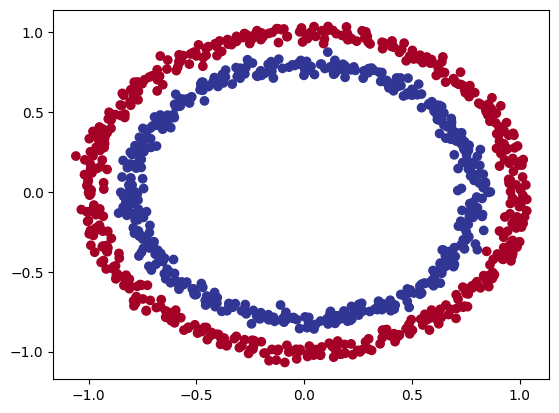

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

In [6]:
# Input and output shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modeling

In [7]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [8]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.7409 - accuracy: 0.4720
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 3.7349 - accuracy: 0.4750
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7842 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7167 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7010 - accuracy: 0.4890


In [9]:
# Let's try and improve our model by training for longer..
model.fit(X,y,epochs=200,verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classifiction problem and our model is getting around 50% accuracy its performing as if it's guessing.

lets add an extra layer.

In [10]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [11]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6941 - accuracy: 0.5000


[0.6940928101539612, 0.5]

## Improving our model

In [12]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [13]:
# evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6975 - accuracy: 0.5140


[0.6975221037864685, 0.5139999985694885]

to visualize our model's predictions , let's create a function `plot_decision_boundary`, this function will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* plot the predictions as well as ine between zone (where each unique class falls)

In [14]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  plots the decision created by a model prediction on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() -0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,0].min() -0.1, X[:,0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi_class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # we have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 3ms/step
doing binary classification


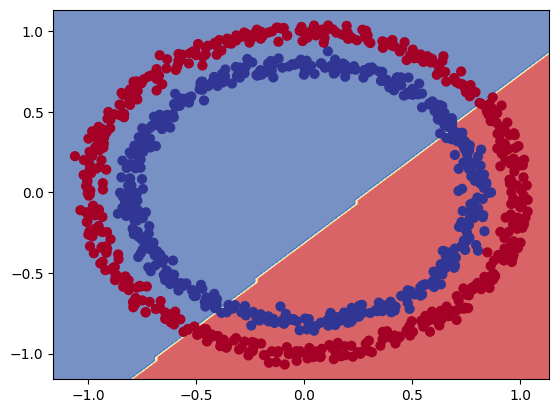

In [15]:
# Check out the predictions our model are making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [16]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)
# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


In [17]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(None,1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100,verbose=0)

2/2 [==============================] - 0s 4ms/step


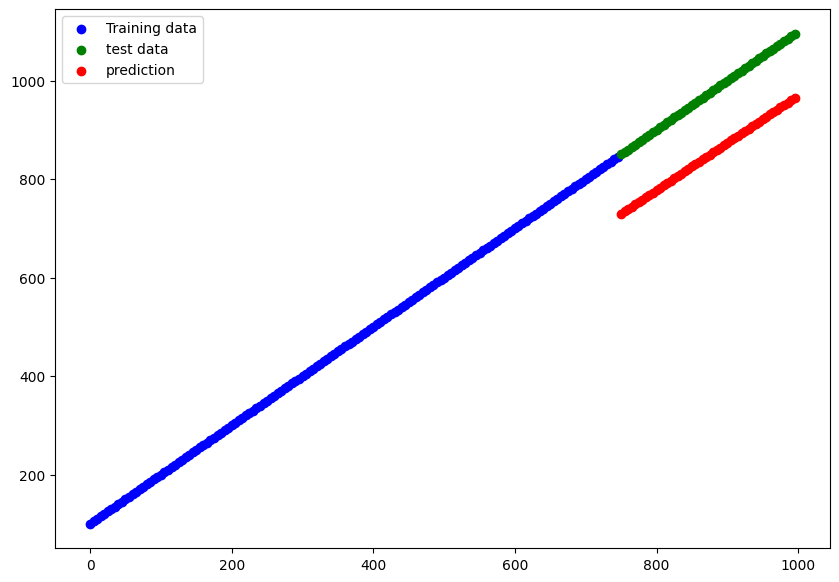

In [18]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test,axis=-1))

# plot the model
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b', label="Training data")
plt.scatter(X_reg_test,y_reg_test,c='g', label="test data")
plt.scatter(X_reg_test,y_reg_preds,c='r', label="prediction")
plt.legend();

## The missing piece: Non Linearity

In [19]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear),
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
history = model_4.fit(X,y,epochs=100,verbose=2)

Epoch 1/100
32/32 - 1s - loss: 6.0582 - accuracy: 0.4830 - 538ms/epoch - 17ms/step
Epoch 2/100
32/32 - 0s - loss: 6.0239 - accuracy: 0.4830 - 46ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 5.9894 - accuracy: 0.4820 - 44ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 5.9441 - accuracy: 0.4810 - 41ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 5.8989 - accuracy: 0.4840 - 41ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 5.8914 - accuracy: 0.4810 - 43ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 5.8884 - accuracy: 0.4810 - 41ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 5.8865 - accuracy: 0.4800 - 43ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 5.8854 - accuracy: 0.4800 - 42ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 5.8840 - accuracy: 0.4810 - 50ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 5.8735 - accuracy: 0.4810 - 43ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 5.8704 - accuracy: 0.4830 - 45ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s

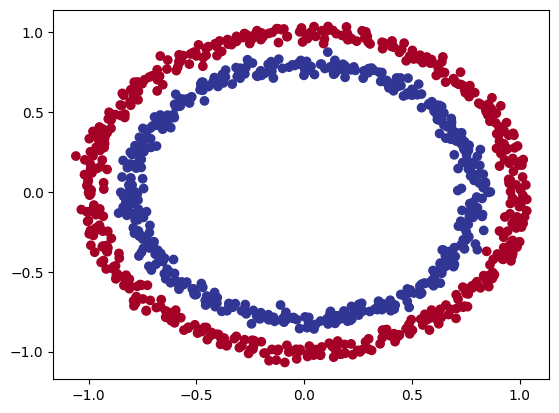

In [20]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


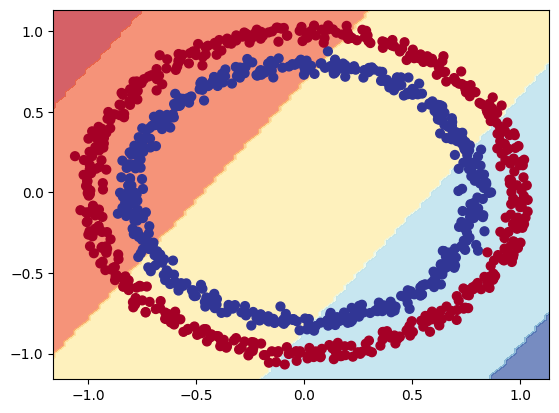

In [21]:
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function

In [22]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu),
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X,y,epochs=100,verbose=0)

313/313 [==============================] - 1s 2ms/step
doing binary classification


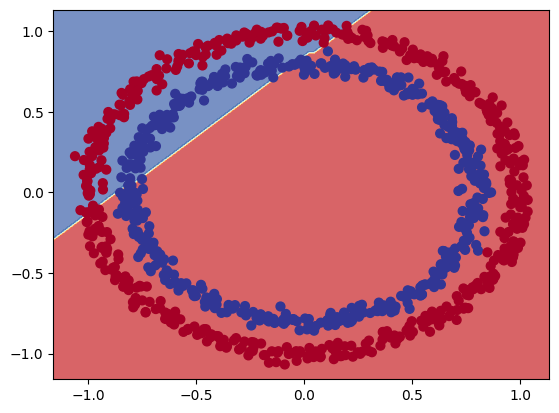

In [23]:
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

In [24]:
# time to replicate the multi-layer neural network from teensorflow playground

#Set a random seed
tf.random.set_seed(42)
# Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
history = model_6.fit(X,y,epochs=250,verbose=0)

In [25]:
# evaluate our model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0775 - accuracy: 0.9770


[0.07751134783029556, 0.9769999980926514]

313/313 [==============================] - 0s 1ms/step
doing binary classification


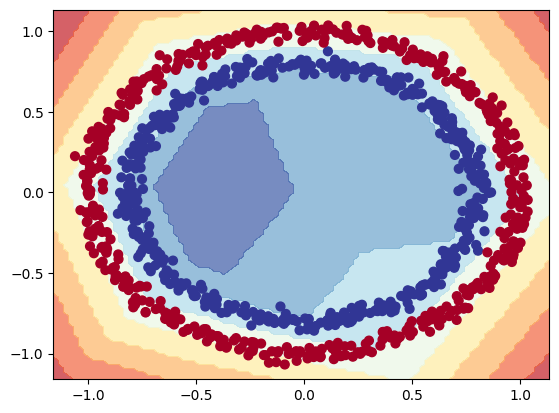

In [26]:
# how do our model prediction look?
plot_decision_boundary(model_6,X,y)

In [27]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit ,activation="sigmoid"the model
history = model_7.fit(X,y,epochs=250,verbose=0)

In [28]:
# evaluate our model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8270


[0.43342989683151245, 0.8270000219345093]

313/313 [==============================] - 0s 1ms/step
doing binary classification


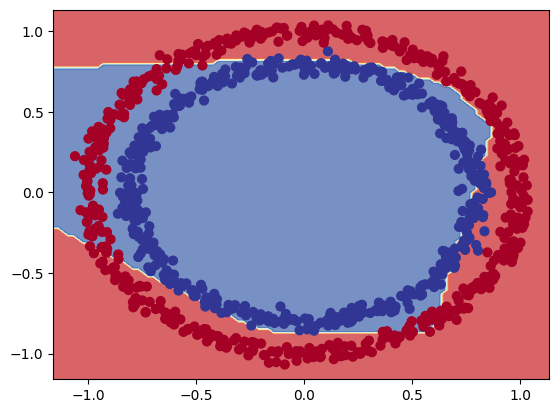

In [29]:
plot_decision_boundary(model_7,X,y)

 ## Now we've discussed the conscept of linear and non_linear functions(or lines), let's see them in action

In [30]:
# Create a  toy tensor
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

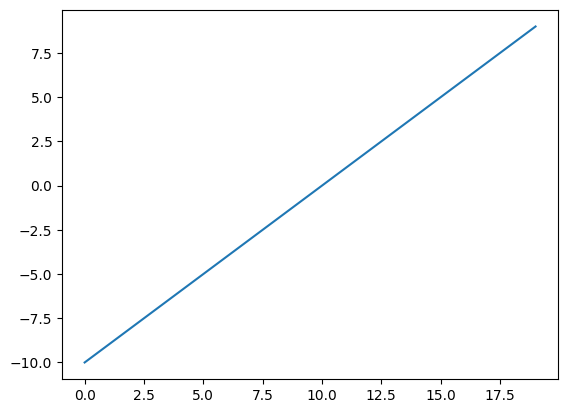

In [31]:
# Visualize our toy tensor
plt.plot(A);

In [32]:
# lets start by replicating sigmoid(x) = 1 / (1+exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid function
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

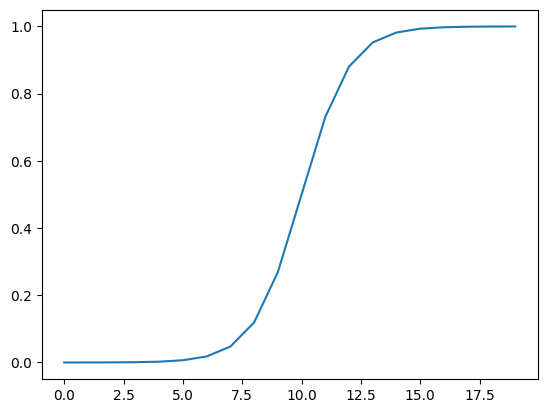

In [33]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [34]:
# Let's recreate relu function
def relu(x):
  return tf.maximum(0,x)

# use the relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

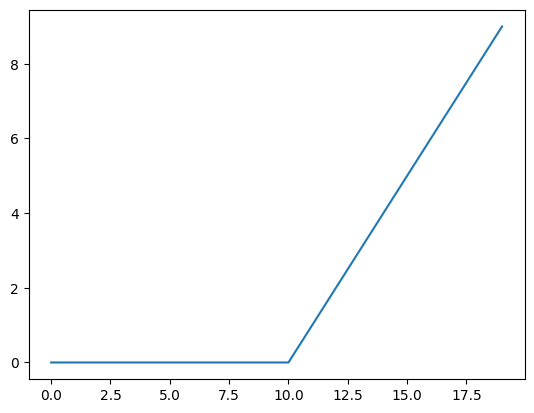

In [35]:
# plot our toy tensor transformed by relu
plt.plot(relu(A))

##Evaluating and improving our classification

In [36]:
# Split into train
X_train, y_train = X[:800],y[:800]
X_test, y_test = X[800:],y[800:]

In [37]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

#Set a random seed
tf.random.set_seed(42)
# Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

# Fit ,activation="sigmoid"the model
history = model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.7142 - accuracy: 0.4913
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.4613
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5125
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5987
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5263
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5337
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5412
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6475
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.6650
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6115 - accuracy: 0.7212
Epoch 11/25
25/25 [

In [38]:
# Evaluate the model
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9700


[0.20319674909114838, 0.9700000286102295]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


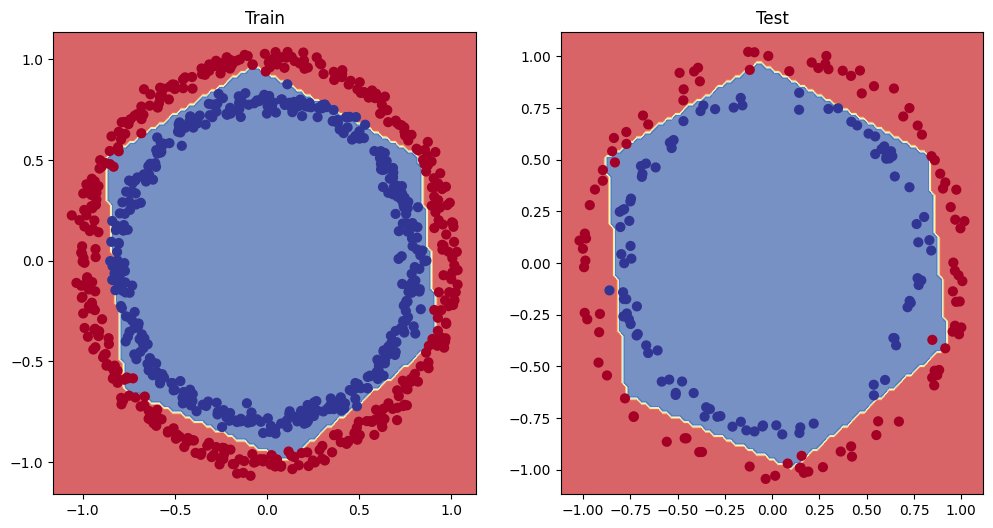

In [39]:
# Plot the decision boundary for the training and test data sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X_test,y_test)
plt.show()

## Plot the loss (or training curves)


In [40]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.714197,0.49125
1,0.697301,0.46125
2,0.691178,0.51250
3,0.688731,0.59875
4,0.685703,0.52625
5,0.681836,0.53375
6,0.675819,0.54125
7,0.664406,0.64750
8,0.642093,0.66500
9,0.611482,0.72125


Text(0.5, 1.0, 'Model_8 loss curves')

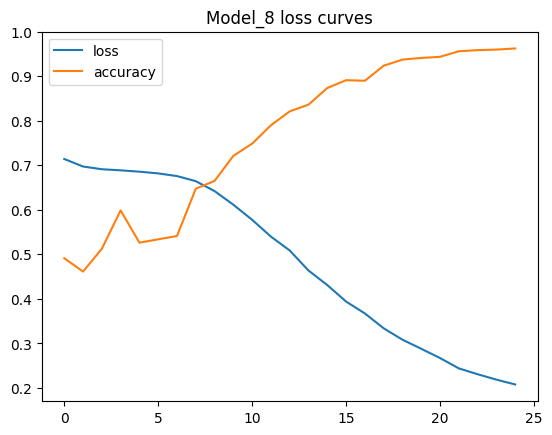

In [41]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during traininig) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your *while* its trainig
* Another model (we could use the same one as above , but we're practicing building model's here.
* A modified loss curve plot

In [42]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
# Create a learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))

# Fit the model (passing lr_shedular callback)
history = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5150 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5138 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5138 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5138 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5150 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5138 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5150 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5125 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

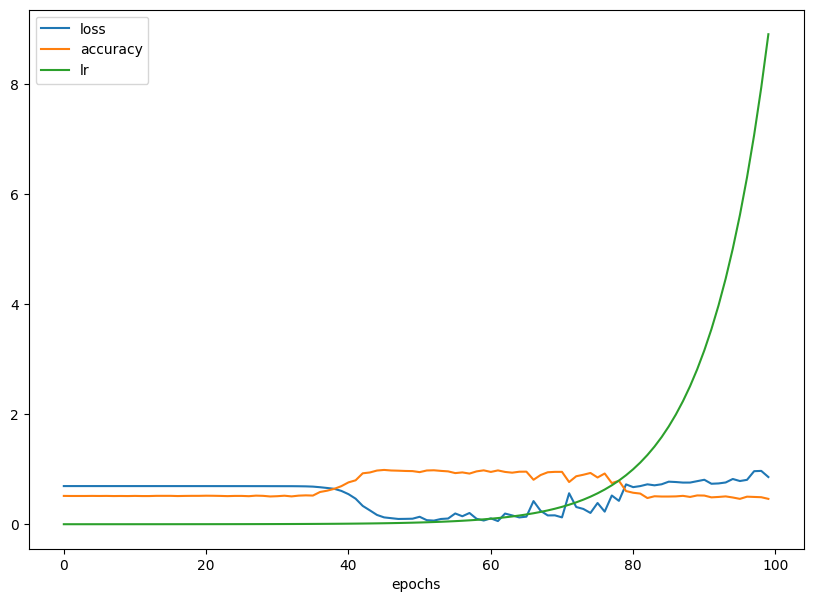

In [43]:
# checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs. Loss')

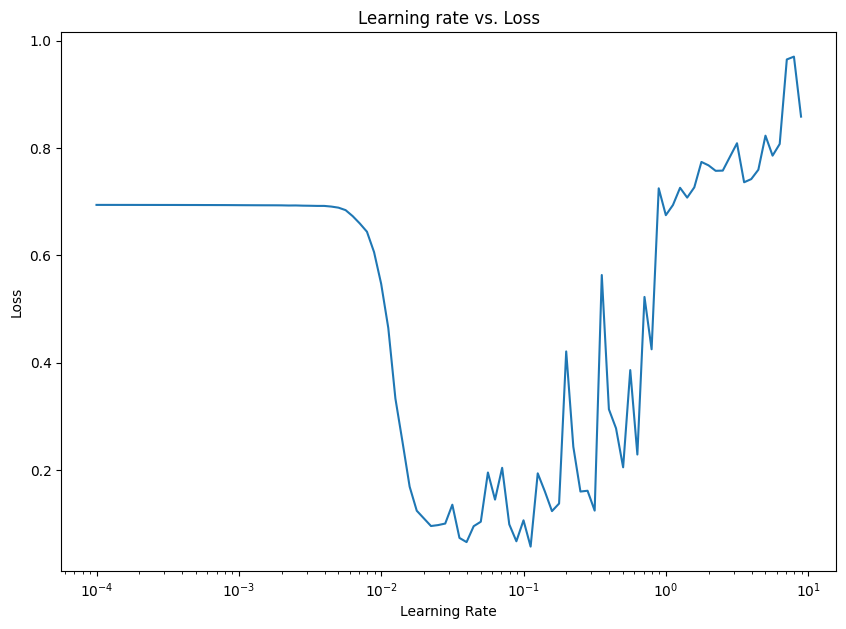

In [44]:
# plot the learning rate versus the loss
lrs = 1e-4 * (10 **(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [51]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["accuracy"])

# Fit ,activation="sigmoid"the model
history_10 = model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6897 - accuracy: 0.5337
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5225
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5312
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5587
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.5725
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.6162
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.6500
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7563
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.8150
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.8562
Epoch 11/20
25/25 [

In [52]:
# evalute the model_10
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1113 - accuracy: 0.9850


[0.1112871766090393, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


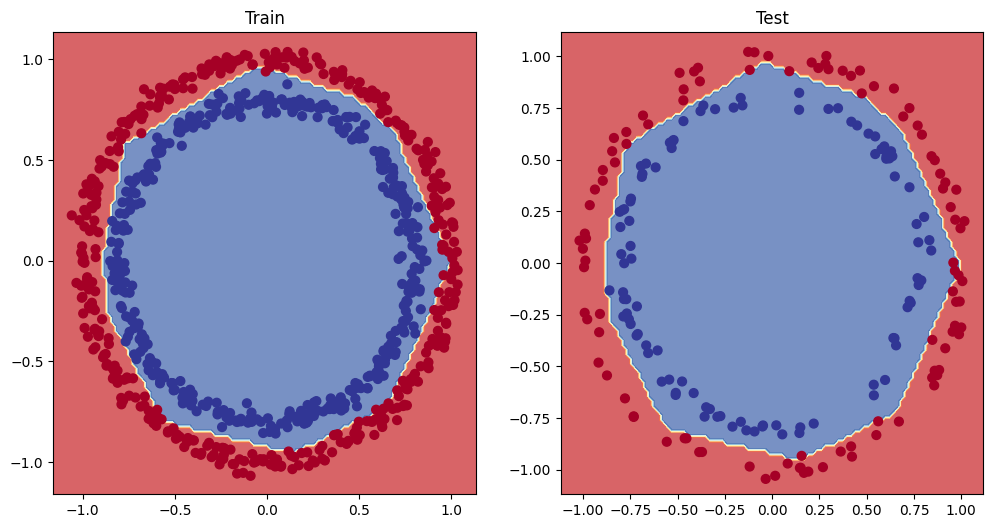

In [53]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X_test,y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our model results as much as possible, there are a handful of other classification evaluation methods and metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from sklearn)

In [54]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set' {loss}")
print(f"model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.1113 - accuracy: 0.9850
Model loss on the test set' 0.1112871766090393
model accuracy on the test set: 98.50%


## How about a confusion marrix

In [55]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make prediction
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [57]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [58]:
y_preds[:10]

array([[0.94760615],
       [0.94760615],
       [0.94760615],
       [0.93101835],
       [0.41294494],
       [0.01135322],
       [0.94760615],
       [0.03484694],
       [0.94760615],
       [0.08750246]], dtype=float32)

oops.. look like our prediction array has come out in **prediction probability** form.. the standard output from the sigmoid (or softmax) activation functions

In [59]:
# Convert prediction probalities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [60]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[98,  3],
       [ 0, 99]])

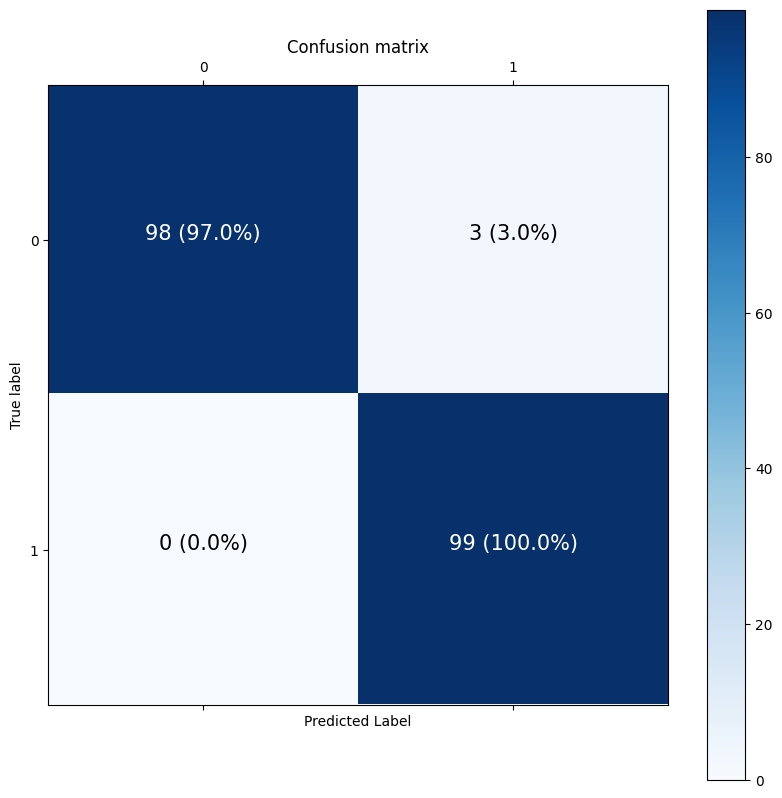

In [65]:
import itertools

figsize = (10,10)

# Create the confusion matrrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes =False
if classes:
  labels=classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion matrix",
       xlabel="Predicted Label",
       ylabel="True label",
       xticks = np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)
# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)